In [9]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os

AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
AWS_DEFAULT_REGION = os.getenv("AWS_DEFAULT_REGION")
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

s3 = boto3.client(
    "s3",
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
    region_name=AWS_DEFAULT_REGION,
)

In [79]:
bucket_keys = {
    "kpi4":"gold/model/kpi04_health_risk_population/part-00000-58b37d98-7b96-42d8-9f08-77a80cb0f9af-c000.snappy.parquet",
    # "kpi5":"gold/model/kpi05_urban_rural_gap_water/part-00000-aa37e629-ab2b-4d1c-867e-bf7258c709cb-c000.snappy.parquet",
    # "kpi6":"gold/model/kpi06_water_gdp_corr/part-00000-3b9acfb3-9e77-4aa5-a5ef-81b5bdf1a56c-c000.snappy.parquet",
    # "kpi7":"gold/model/kpi07_water_sanitation_gap/part-00000-7c893d94-aa92-429f-becf-bc608b29dced-c000.snappy.parquet",
}

df_kpis = {}

def read_parquet_from_s3(bucket, key):
    obj = s3.get_object(Bucket=bucket, Key=key)
    bytestream = io.BytesIO(obj["Body"].read())
    df = pd.read_parquet(bytestream)
    return df

for kpi, kpi_key in bucket_keys.items():
    df_kpis[kpi] = read_parquet_from_s3(bucket=S3_BUCKET_NAME,key=kpi_key)

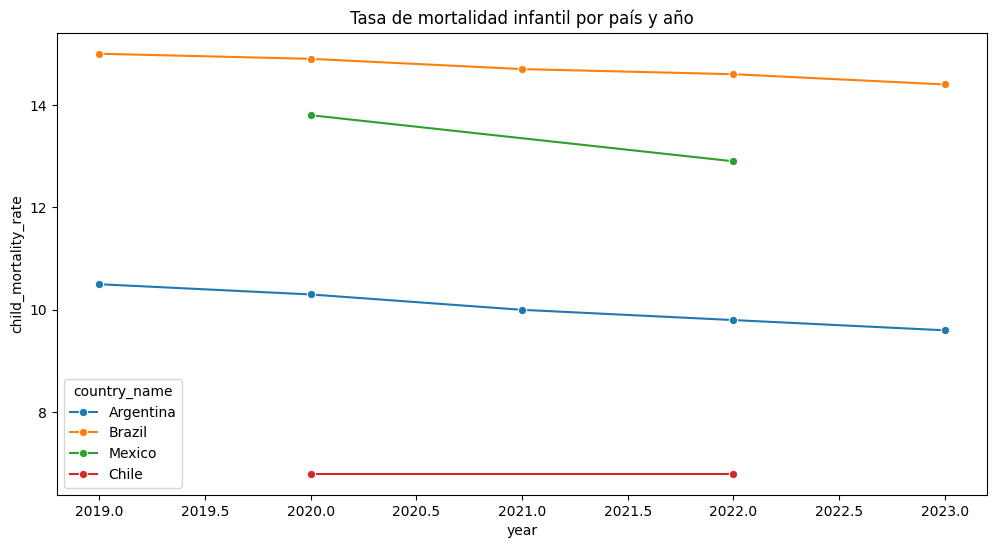

In [80]:
# kpi4

df4 = df_kpis["kpi4"].copy()

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df4, x="year", y="child_mortality_rate", hue="country_name", marker="o", ax=ax)
ax.set_title("Tasa de mortalidad infantil por país y año")
plt.show()


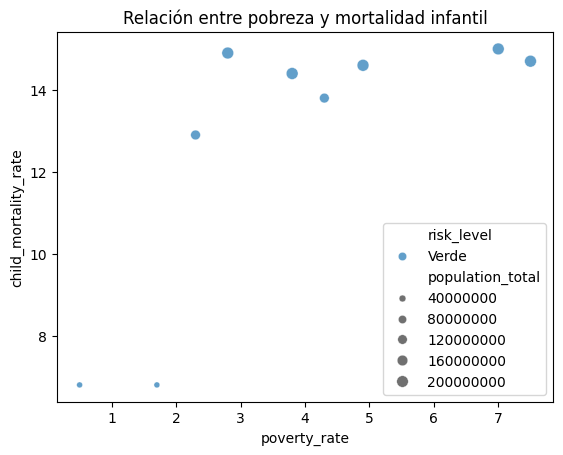

In [15]:
sns.scatterplot(data=df4, x="poverty_rate", y="child_mortality_rate", hue="risk_level", size="population_total", alpha=0.7)
plt.title("Relación entre pobreza y mortalidad infantil")
plt.show()

In [81]:
df4

,country_key,country_name,year,sanitation_coverage_pct,child_mortality_rate,poverty_rate,population_total,pct_population_high_risk,risk_level
0,35,Argentina,2023,1.53,9.600,1.20,45538401,0.00,Verde
1,23,Brazil,2020,54.84,14.900,2.80,208660842,0.00,Verde
2,23,Brazil,2022,49.74,14.600,4.90,210306415,0.00,Verde
3,35,Argentina,2020,2.32,10.300,2.20,45191965,0.00,Verde
4,15,Mexico,2022,25.67,12.900,2.30,128613117,0.00,Verde
5,23,Brazil,2019,57.45,15.000,7.00,207455459,0.00,Verde
6,19,Chile,2022,0.00,6.800,0.50,19553036,0.00,Verde
7,23,Brazil,2021,52.22,14.700,7.50,209550294,0.00,Verde
8,35,Argentina,2019,2.49,10.500,1.70,44973465,0.00,Verde
9,35,Argentina,2021,1.64,10.000,1.40,45312281,0.00,Verde


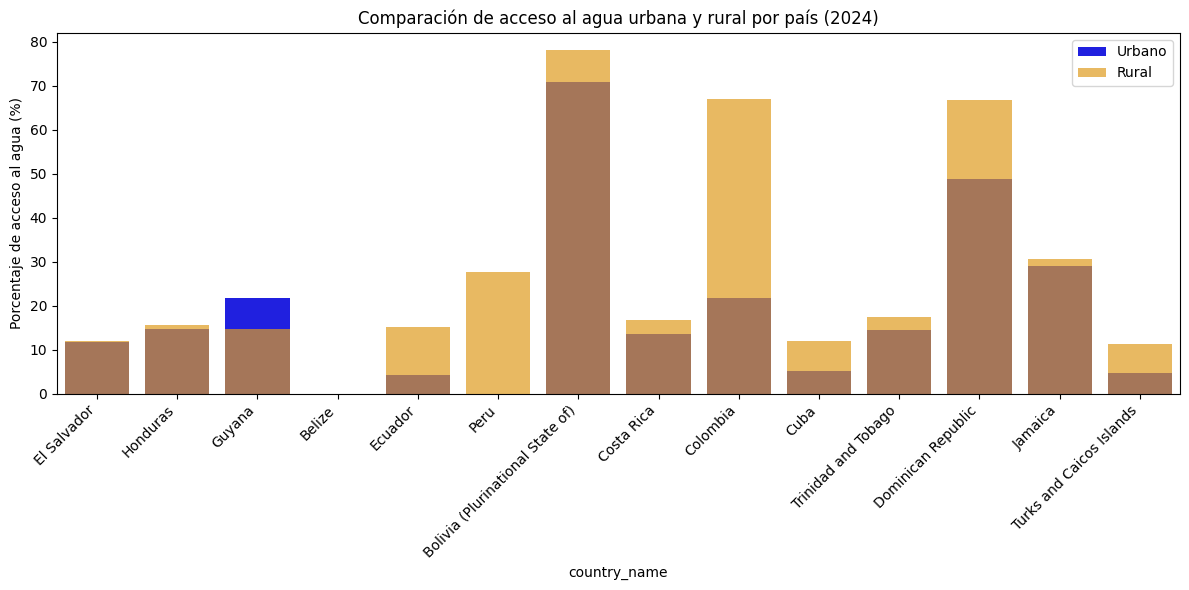

In [21]:
df5 = df_kpis["kpi5"].copy()

df5_2024 = df5[df5['year'] == 2024]

plt.figure(figsize=(12,6))
sns.barplot(data=df5_2024, x='country_name', y='water_urban_pct', color='blue', label='Urbano')
sns.barplot(data=df5_2024, x='country_name', y='water_rural_pct', color='orange', label='Rural', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Porcentaje de acceso al agua (%)")
plt.title("Comparación de acceso al agua urbana y rural por país (2024)")
plt.legend()
plt.tight_layout()
plt.show()


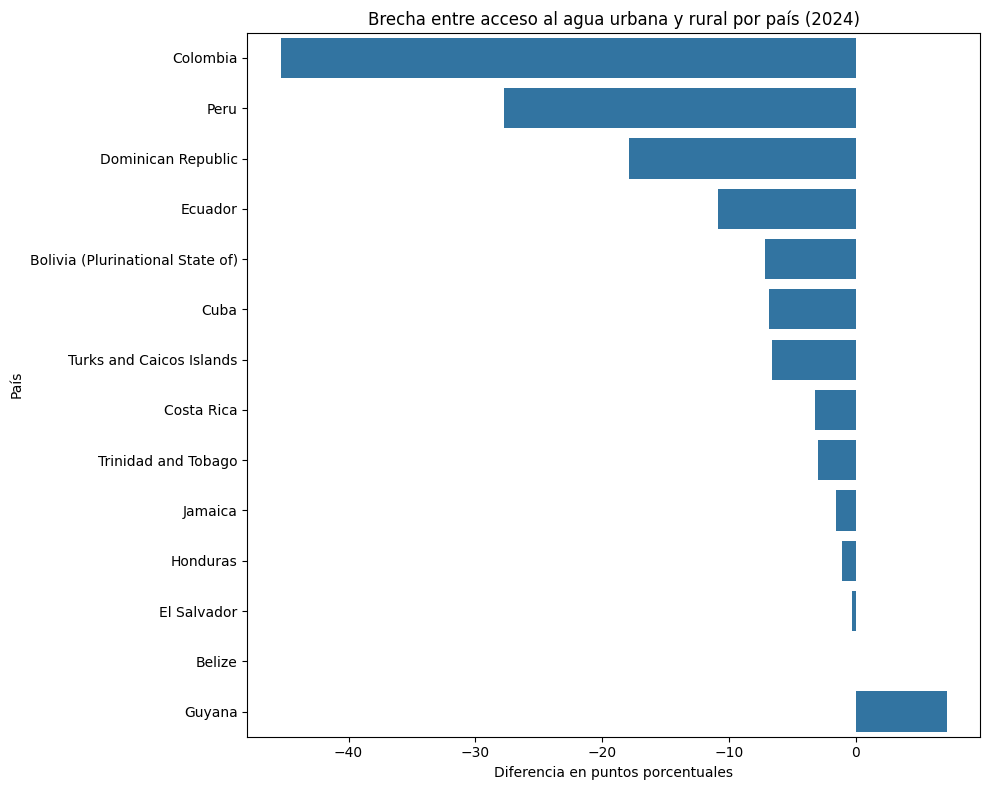

In [24]:
df5_2024_sorted = df5_2024.sort_values('gap_urban_rural_pp')

plt.figure(figsize=(10,8))
sns.barplot(data=df5_2024_sorted, x='gap_urban_rural_pp', y='country_name')
plt.title("Brecha entre acceso al agua urbana y rural por país (2024)")
plt.xlabel("Diferencia en puntos porcentuales")
plt.ylabel("País")
plt.tight_layout()
plt.show()

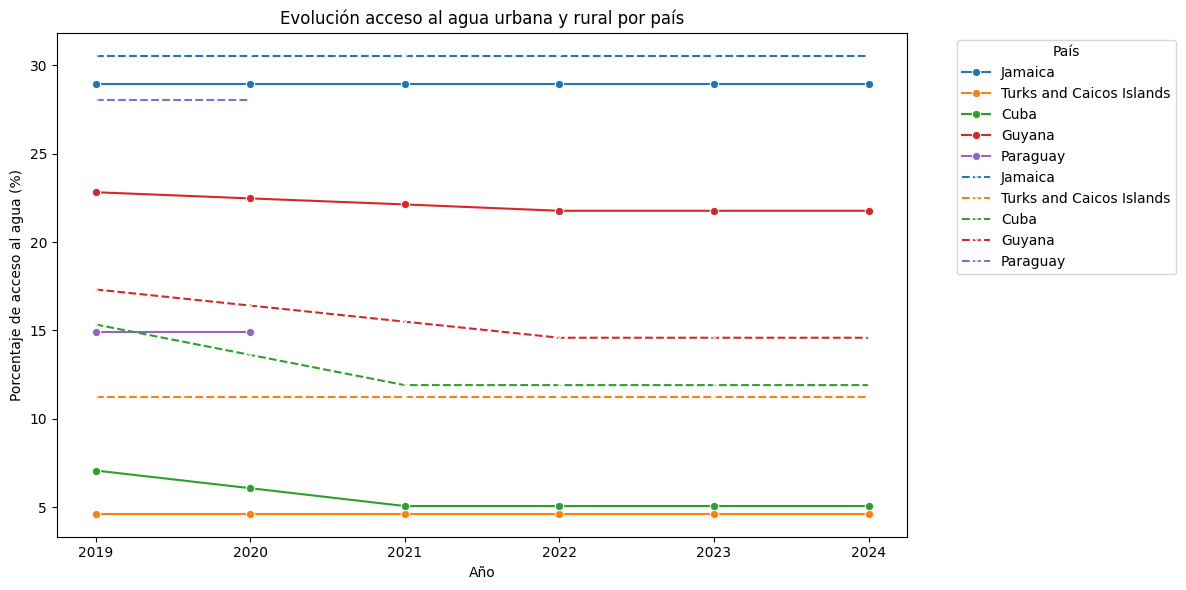

In [35]:
import numpy as np
plt.figure(figsize=(12,6))

paises_rd = np.random.choice(df5['country_name'].unique(), size=5, replace=False)

df5_rd = df5[df5['country_name'].isin(paises_rd)]

sns.lineplot(data=df5_rd, x='year', y='water_urban_pct', hue='country_name', marker='o')
sns.lineplot(data=df5_rd, x='year', y='water_rural_pct', hue='country_name', marker='x', linestyle='--')

plt.title("Evolución acceso al agua urbana y rural por país")
plt.ylabel("Porcentaje de acceso al agua (%)")
plt.xlabel("Año")
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

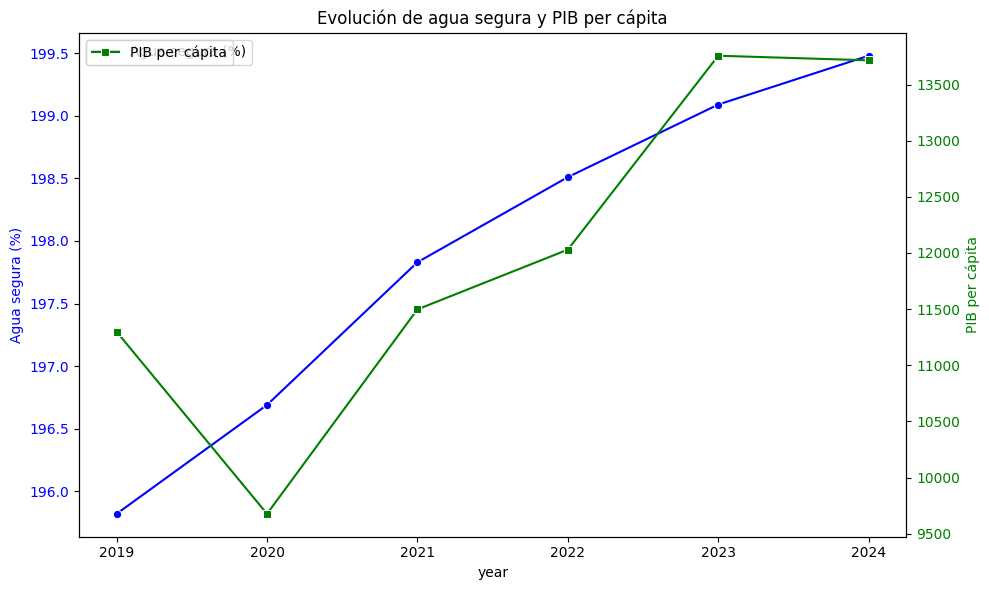

In [41]:
df6 = df_kpis["kpi6"].copy()


fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(data=df6, x='year', y='avg_safe_water_pct', marker='o', ax=ax1, color='blue', label='Agua segura (%)')
ax1.set_ylabel('Agua segura (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(data=df6, x='year', y='avg_gdp_per_capita', marker='s', ax=ax2, color='green', label='PIB per cápita')
ax2.set_ylabel('PIB per cápita', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Evolución de agua segura y PIB per cápita')
fig.tight_layout()
plt.show()


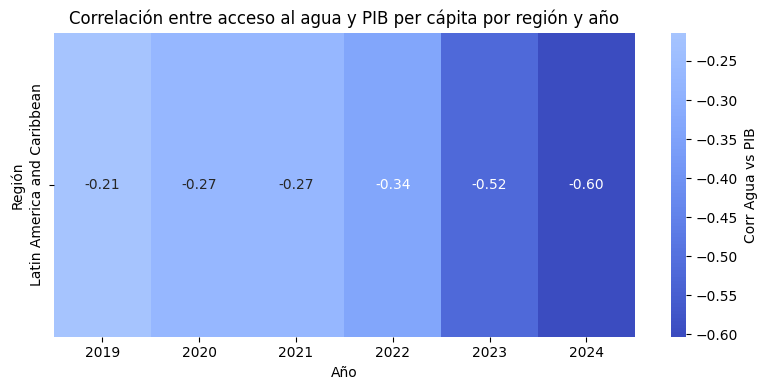

In [43]:
df6['corr_water_vs_gdp'] = pd.to_numeric(df6['corr_water_vs_gdp'], errors='coerce')
df6['year'] = pd.to_numeric(df6['year'], errors='coerce')
pivot_corr = df6.pivot(index='region_name', columns='year', values='corr_water_vs_gdp')

plt.figure(figsize=(8,4))
sns.heatmap(pivot_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", cbar_kws={'label': 'Corr Agua vs PIB'})
plt.title('Correlación entre acceso al agua y PIB per cápita por región y año')
plt.xlabel('Año')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

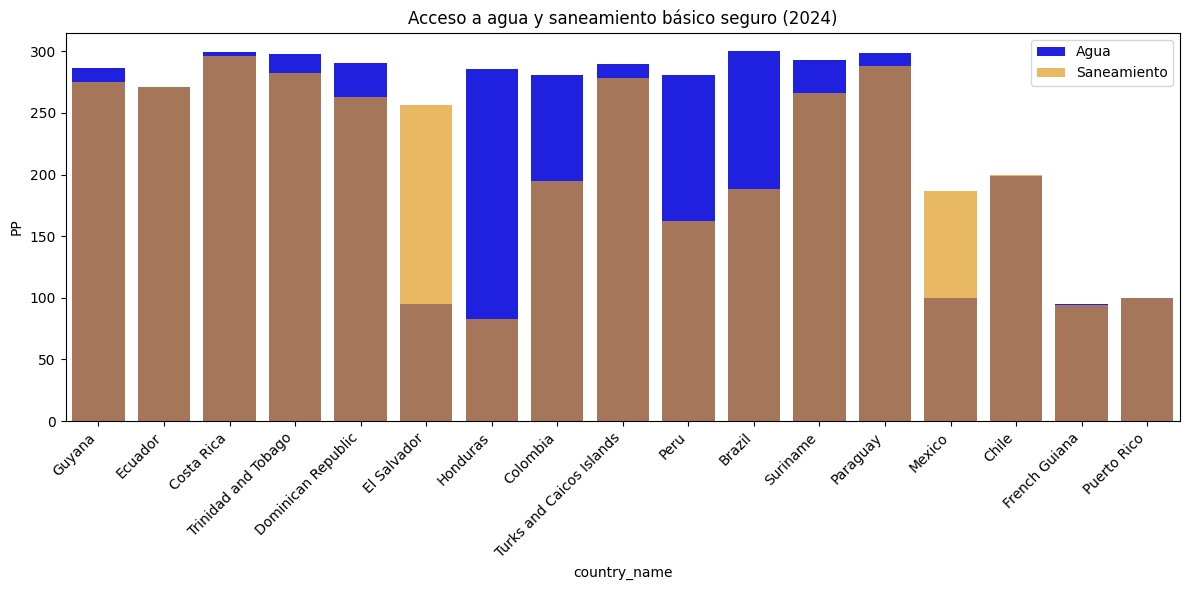

In [52]:
df7 = df_kpis["kpi7"].copy()

ultimo_anio = df7['year'].max()
df_ultimo = df7[df7['year'] == ultimo_anio]

plt.figure(figsize=(12,6))
sns.barplot(data=df_ultimo, x='country_name', y='water_basic_safe_pct', color='blue', label='Agua')
sns.barplot(data=df_ultimo, x='country_name', y='sanitation_basic_safe_pct', color='orange', label='Saneamiento', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.ylabel("PP")
plt.title(f"Acceso a agua y saneamiento básico seguro ({ultimo_anio})")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\c4dex\AppData\Local\Temp\ipykernel_29672\2664515424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ultimo_sorted, x='gap_water_sanitation_pp', y='country_name', palette='coolwarm')


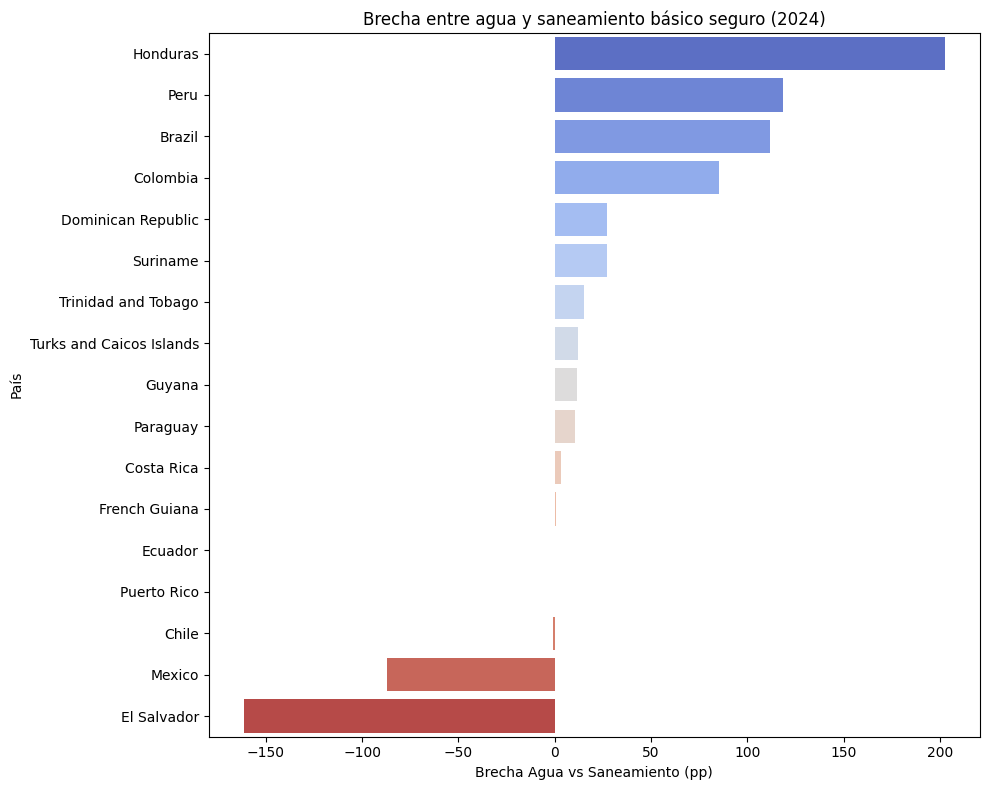

In [47]:
df_ultimo_sorted = df_ultimo.sort_values('gap_water_sanitation_pp', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=df_ultimo_sorted, x='gap_water_sanitation_pp', y='country_name', palette='coolwarm')
plt.xlabel("Brecha Agua vs Saneamiento (pp)")
plt.ylabel("País")
plt.title(f"Brecha entre agua y saneamiento básico seguro ({ultimo_anio})")
plt.tight_layout()
plt.show()

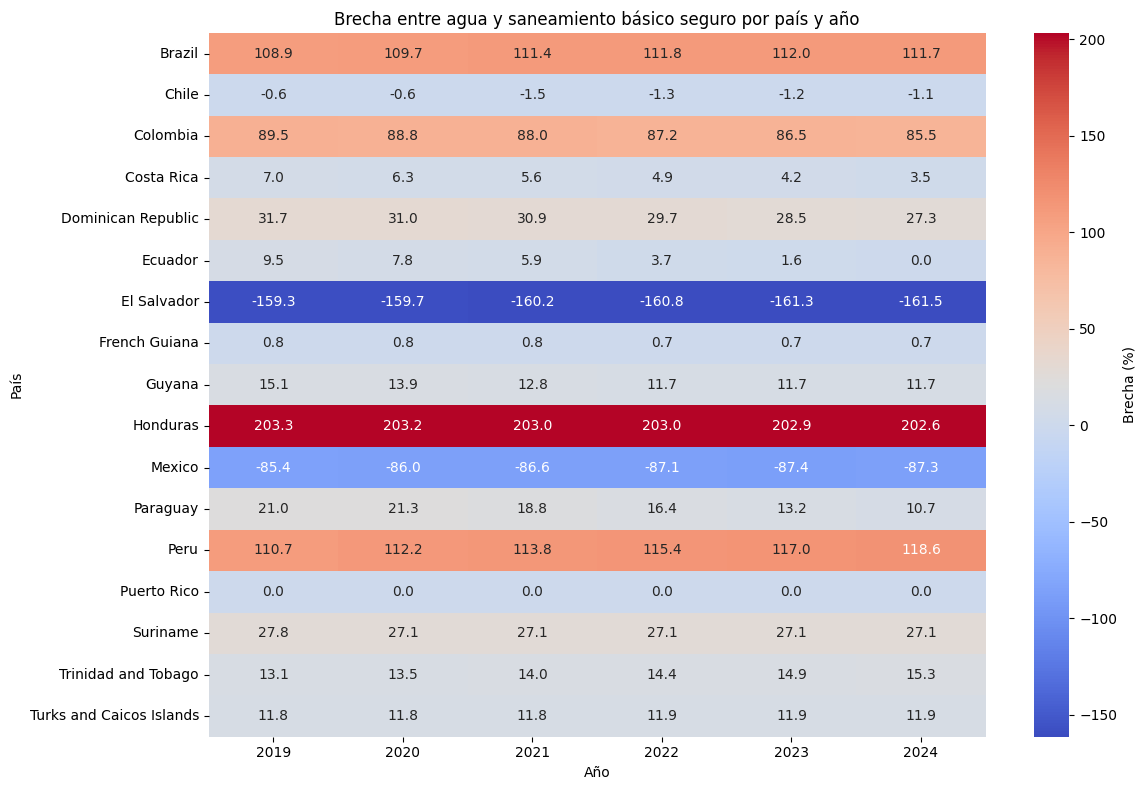

In [51]:
pivot_gap = df7.pivot(index='country_name', columns='year', values='gap_water_sanitation_pp')


df7['gap_water_sanitation_pp'] = pd.to_numeric(df7['gap_water_sanitation_pp'], errors='coerce')
pivot_gap = df7.pivot(index='country_name', columns='year', values='gap_water_sanitation_pp')
pivot_gap = pivot_gap.fillna(0)

# Graficar heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot_gap, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Brecha (%)'})
plt.title("Brecha entre agua y saneamiento básico seguro por país y año")
plt.xlabel("Año")
plt.ylabel("País")
plt.tight_layout()
plt.show()

In [62]:
bucket_keys["kpi1"] = "gold/model/kpi01_climate_water/part-00000-dac95a4b-9d15-40b2-95cb-118611c70777-c000.snappy.parquet"

In [66]:
df = read_parquet_from_s3(bucket=S3_BUCKET_NAME,key=bucket_keys["kpi1"])
df1 = df.copy()

In [76]:
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_key           15 non-null     int32  
 1   country_name          15 non-null     object 
 2   residence_type_key    15 non-null     int64  
 3   residence_type_desc   15 non-null     object 
 4   year                  15 non-null     int32  
 5   precip_total_mm_year  15 non-null     float64
 6   delta_precip_mm       15 non-null     float64
 7   safe_water_pct        15 non-null     float64
 8   delta_safe_water_pp   15 non-null     float64
 9   start_year            15 non-null     int32  
 10  end_year              15 non-null     int32  
 11  years_observed        15 non-null     int64  
 12  corr_precip_vs_water  15 non-null     float64
 13  corr_abs_value        15 non-null     float64
 14  risk_level            15 non-null     object 
 15  impact_direction      15 

,country_key,country_name,residence_type_key,residence_type_desc,year,precip_total_mm_year,delta_precip_mm,safe_water_pct,delta_safe_water_pp,start_year,end_year,years_observed,corr_precip_vs_water,corr_abs_value,risk_level,impact_direction
0,15,Mexico,1,urban,2020,24883.4,1135.9,99.69,0.15,2020,2024,5,-0.052293,0.052293,green,uncertain
1,15,Mexico,1,urban,2021,27793.0,2909.6,99.85,0.16,2020,2024,5,-0.052293,0.052293,green,uncertain
2,15,Mexico,1,urban,2022,24927.7,-2865.3,100.00,0.15,2020,2024,5,-0.052293,0.052293,green,uncertain
3,15,Mexico,1,urban,2023,19091.2,-5836.5,100.00,0.00,2020,2024,5,-0.052293,0.052293,green,uncertain
4,15,Mexico,1,urban,2024,27001.8,7910.6,100.00,0.00,2020,2024,5,-0.052293,0.052293,green,uncertain
5,15,Mexico,2,rural,2020,24883.4,1135.9,94.76,0.68,2020,2024,5,0.683858,0.683858,red,direct
6,15,Mexico,2,rural,2021,27793.0,2909.6,95.44,0.68,2020,2024,5,0.683858,0.683858,red,direct
7,15,Mexico,2,rural,2022,24927.7,-2865.3,96.12,0.68,2020,2024,5,0.683858,0.683858,red,direct
8,15,Mexico,2,rural,2023,19091.2,-5836.5,96.79,0.67,2020,2024,5,0.683858,0.683858,red,direct
9,15,Mexico,2,rural,2024,27001.8,7910.6,97.47,0.68,2020,2024,5,0.683858,0.683858,red,direct


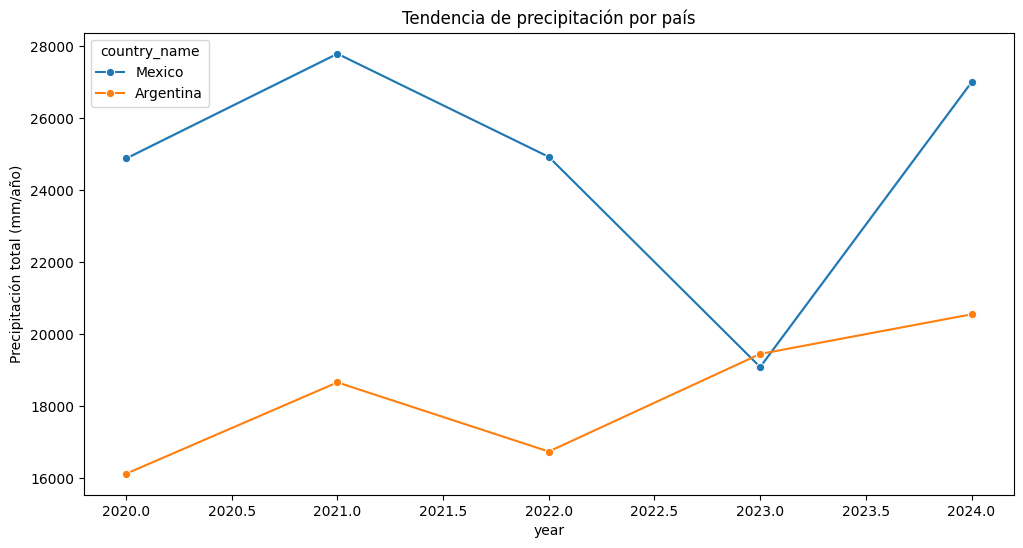

In [68]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x='year', y='precip_total_mm_year', hue='country_name', marker='o')
plt.title('Tendencia de precipitación por país')
plt.ylabel('Precipitación total (mm/año)')
plt.show()

C:\Users\c4dex\AppData\Local\Temp\ipykernel_29672\2792564753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='residence_type_desc', y='safe_water_pct', palette='Set3')


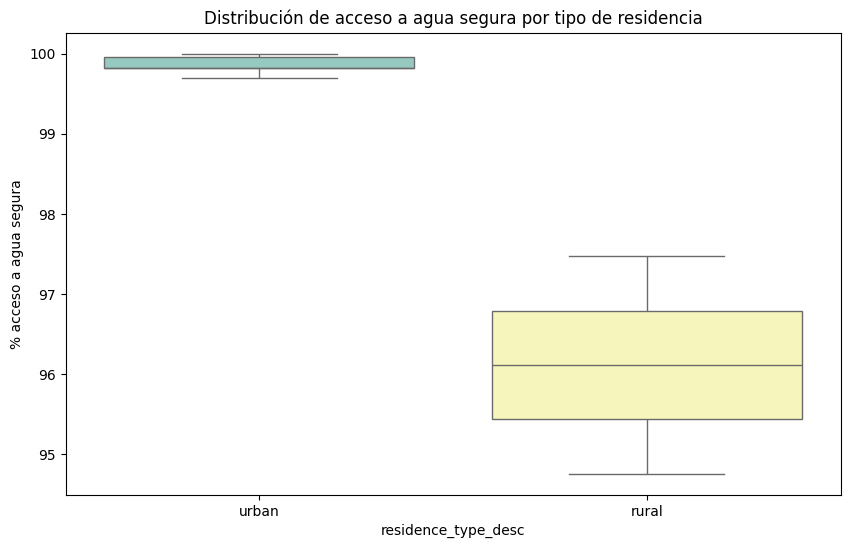

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='residence_type_desc', y='safe_water_pct', palette='Set3')
plt.title('Distribución de acceso a agua segura por tipo de residencia')
plt.ylabel('% acceso a agua segura')
plt.show()

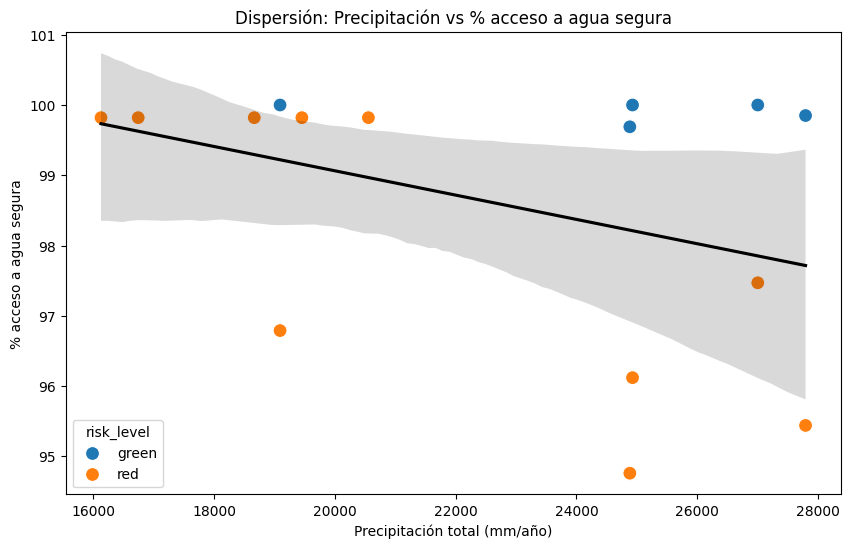

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='precip_total_mm_year', y='safe_water_pct', hue='risk_level', s=100)
sns.regplot(data=df1, x='precip_total_mm_year', y='safe_water_pct', scatter=False, color='black')
plt.title('Dispersión: Precipitación vs % acceso a agua segura')
plt.xlabel('Precipitación total (mm/año)')
plt.ylabel('% acceso a agua segura')
plt.show()

C:\Users\c4dex\AppData\Local\Temp\ipykernel_29672\3492635147.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='corr_precip_vs_water', y='country_name', palette=colors)
C:\Users\c4dex\AppData\Local\Temp\ipykernel_29672\3492635147.py:7: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  sns.barplot(data=df, x='corr_precip_vs_water', y='country_name', palette=colors)


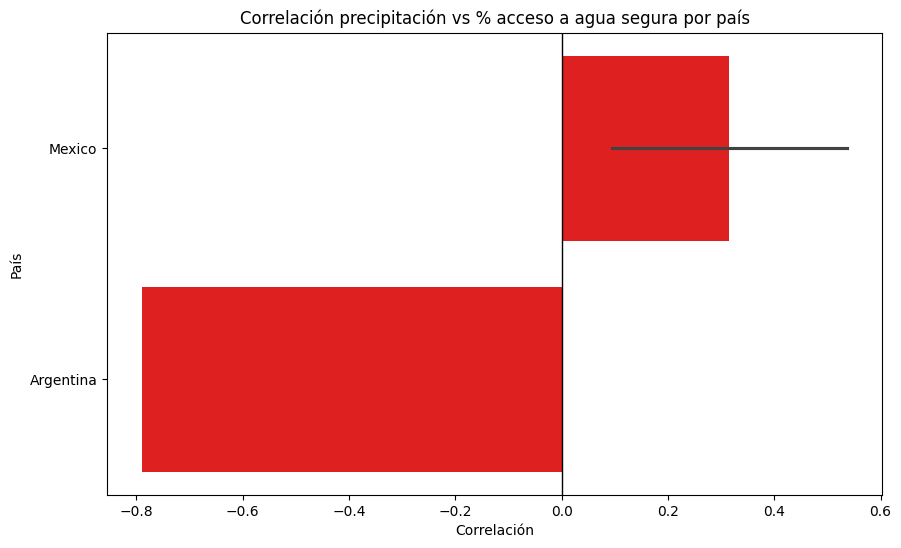

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['green' if x > 0 else 'red' for x in df['corr_precip_vs_water']]

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='corr_precip_vs_water', y='country_name', palette=colors)
plt.axvline(0, color='black', linewidth=1)  # línea en cero
plt.title('Correlación precipitación vs % acceso a agua segura por país')
plt.xlabel('Correlación')
plt.ylabel('País')
plt.show()
